In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./datasets/pizza_delivery.csv")

In [3]:
df.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
0,Thursday,01-May-14,35.128367,Laura,East,Bruno,68.287716,58.4,4,0,0,1
1,Thursday,01-May-14,25.203074,Melissa,East,Salvatore,70.997791,26.4,2,0,0,0
2,Thursday,01-May-14,45.643404,Melissa,West,Salvatore,53.394145,58.1,3,1,0,0
3,Thursday,01-May-14,29.374298,Melissa,East,Salvatore,70.306596,35.2,3,0,0,0
4,Thursday,01-May-14,29.994610,Melissa,West,Salvatore,71.501688,38.4,2,0,0,0


<Axes: xlabel='time', ylabel='temperature'>

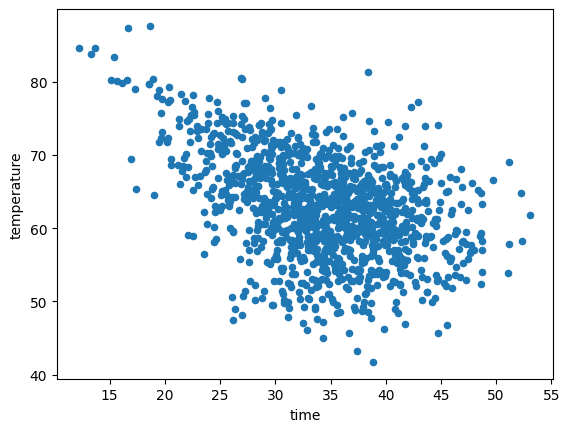

In [5]:
df.plot.scatter('time', "temperature")

In [6]:
group = df.groupby("driver")

In [8]:
df.driver.unique()

array(['Bruno', 'Salvatore', 'Mario', 'Luigi', 'Domenico'], dtype=object)

In [9]:
Bruno_data = group.get_group("Bruno")
Salvatore_data = group.get_group("Salvatore")
Mario_data = group.get_group("Mario")
Luigi_data = group.get_group("Luigi")
Domenico_data = group.get_group("Domenico")

<Axes: xlabel='time', ylabel='temperature'>

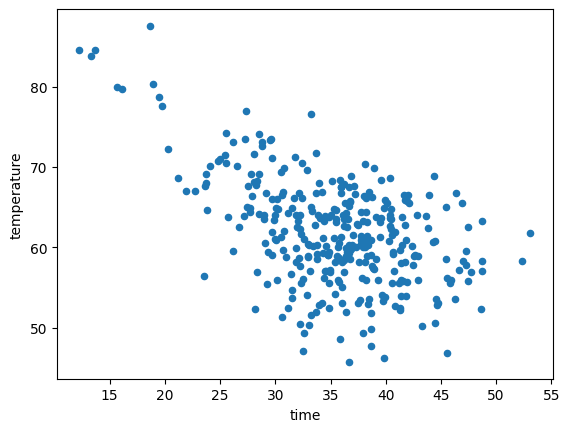

In [12]:
Bruno_data.plot.scatter("time", "temperature")

<Axes: xlabel='time', ylabel='temperature'>

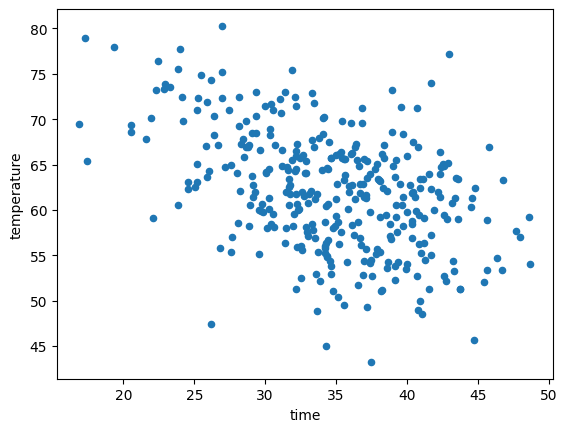

In [13]:
Salvatore_data.plot.scatter("time", "temperature")

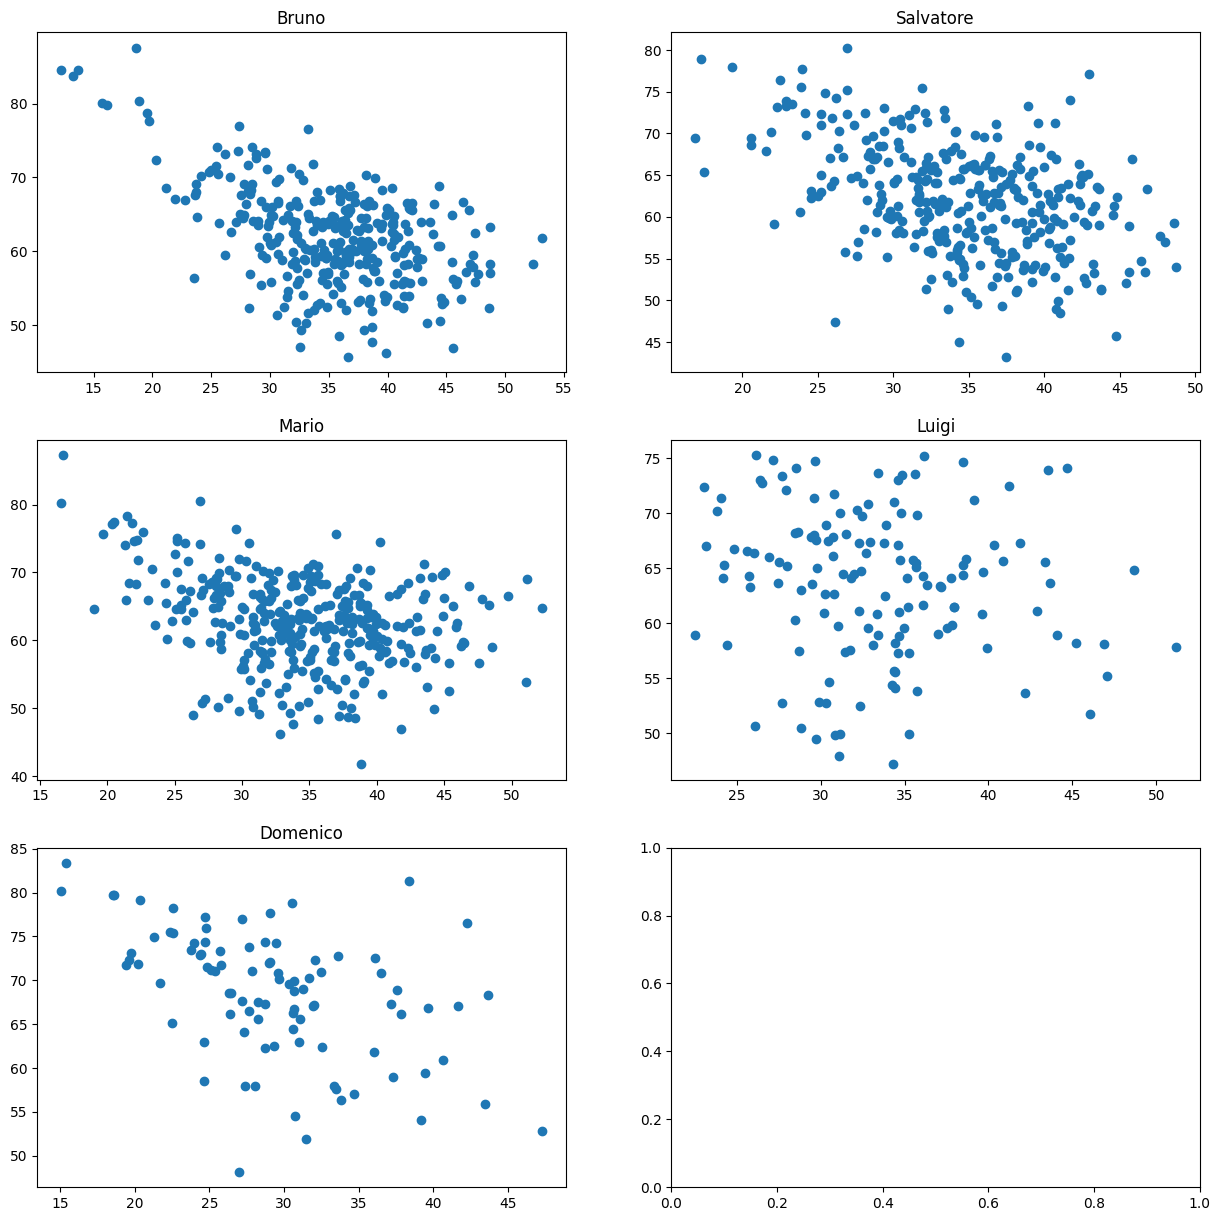

In [20]:
fig, axeses = plt.subplots(figsize=(15,15), ncols=2, nrows=3)

axes1, axes2 = axeses[0]
axes3, axes4 = axeses[1]
axes5, axes6 = axeses[2]


_axeses = [axes1, axes2, axes3, axes4, axes5]
groups = [ group.get_group(driver) for driver in df.driver.unique()]

for _ax,_group,driver in zip(_axeses, groups, df.driver.unique()):
    _ax.scatter(_group.time, _group.temperature)
    _ax.set_title(driver)
    

In [25]:
for driver in df.driver.unique():
    data = group.get_group(driver)
    print(f"{driver:10s}: {data.time.corr(data.temperature):0.2f}")

Bruno     : -0.53
Salvatore : -0.44
Mario     : -0.32
Luigi     : -0.13
Domenico  : -0.49
